# Import libraries

In [76]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    GridSearchCV
from sklearn.linear_model import LinearRegression, \
                                 ElasticNet
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, \
                            mean_absolute_error, \
                            mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBRegressor
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]
- NumPy 2.1.1
- pandas 2.2.3
- Matplotlib 3.9.2
- Seaborn 0.13.2
- scikit-learn 1.6.1
- XGBoost 3.0.1


# Load and preview the data

In [77]:
Regression_data = pd.read_pickle('Data_Cleaned_2.pickle')

Regression_data.head(n = 100)


,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,CATEGORY_ERROR,YEAR,TIME_BIN,IS_WEEKEND,MONTH
0,1,1,Desktop,2023-10-29 09:47:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,True,10
1,1,1,Desktop,2023-10-29 09:54:00,Passing Parameter,116.0.0.0,Chrome,PassingParam,2023,Morning,True,10
2,3,1,Desktop,2023-10-29 22:19:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,True,10
3,3,1,Desktop,2023-10-30 00:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,False,10
4,1,1,Desktop,2023-10-30 08:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,Desktop,2023-11-08 09:14:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,11
96,5,1,Desktop,2023-11-08 10:55:00,Passing Parameter,115.0.0.0,Firefox,PassingParam,2023,Morning,False,11
97,5,1,Desktop,2023-11-08 11:06:00,Passing Parameter,119.0.0.0,Firefox,PassingParam,2023,Morning,False,11
98,4,1,Desktop,2023-11-08 11:39:00,Passing Parameter,119.0.0.0,Chrome,PassingParam,2023,Morning,False,11


In [78]:
#Check the shape of the data
Regression_data.shape

(671, 12)

In [79]:
#Check the data types
Regression_data.dtypes

PAGE_NO                      int64
TOTAL_ANNOTATION             int64
DEVICE_NAME         string[python]
CREATED_DATE        datetime64[ns]
PROCESS_STAGE       string[python]
BROWSER_VERSION             object
BROWSER_NAME                object
CATEGORY_ERROR              object
YEAR                         int32
TIME_BIN                    object
IS_WEEKEND                    bool
MONTH                        int32
dtype: object

# Study Feature

1) CREATED_DATE - The date and time when the issue occurred.

2) BROWSER_NAME - The name of the browser used (e.g., Chrome, Firefox).

3) BROWSER_VERSION - The version number of the browser (e.g., Chrome 119.0.0.0, Firefox 118.0.0.0).

4) CATEGORY_ERROR	The type/category of the error encountered- extract from PROCESS_STAGE features.

5) IS_WEEKEND	Indicates whether the issue occurred on a weekend (True or False).

6) TIME_BIN	The time of day grouped into categories (e.g., Morning, Night).

7) MONTH	The month when the issue occurred (numeric format: 1–12).

8) YEAR	The year when the issue occurred (e.g., 2023).

9) DEVICE_NAME	The type of device used (e.g., Desktop, Mobile).

10) PROCESS_STAGE	The current stage of the system or process where the error occurred.The Features is the detail error.

11) Features for Numeric only - PAGE_NO,TOTAL_ANNOTATION,YEAR,TIME_BIN(if we can change to one hot encoding),IS_WEEKEND(if we can change to one hot encoding),MONTH

22) Features for Category only - DEVICE_NAME,BROWSER_NAME,BROWSER_VERSION,CATEGORY_ERROR

# Objective

1) Build a model Regression to Predict the total_annotation that will be add by user
2) Remove features not using anymore
3) Use on hot encoding for category features
4) Train and Test
5) Evaluate The Model
6) For Learning Purposes

# PreProcessing Data

In [80]:
Regression_data = Regression_data.drop(columns=["CREATED_DATE","PROCESS_STAGE"])

In [81]:
#change IS_WEEKEND ke 0/1
Regression_data["IS_WEEKEND"] = Regression_data["IS_WEEKEND"].astype(int)


In [82]:
#one hot encoding categorical variables
Regression_data = pd.get_dummies(Regression_data, drop_first=True)

In [83]:

Regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PAGE_NO                                      671 non-null    int64  
 1   TOTAL_ANNOTATION                             671 non-null    int64  
 2   YEAR                                         671 non-null    int32  
 3   IS_WEEKEND                                   671 non-null    int64  
 4   MONTH                                        671 non-null    int32  
 5   DEVICE_NAME_Mobile                           671 non-null    boolean
 6   BROWSER_VERSION_111.0.0.0                    671 non-null    bool   
 7   BROWSER_VERSION_114.0.0.0                    671 non-null    bool   
 8   BROWSER_VERSION_115.0.0.0                    671 non-null    bool   
 9   BROWSER_VERSION_116.0.0.0                    671 non-null    bool   
 10  BR

# 1)Target Feature

In [84]:
# 1) Explore the distribution of the target variable
Regression_data.TOTAL_ANNOTATION.describe()

count    671.000000
mean       2.533532
std        3.193976
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       28.000000
Name: TOTAL_ANNOTATION, dtype: float64

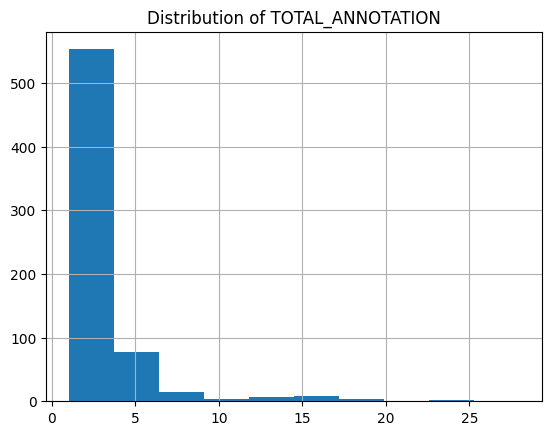

In [85]:
# 1) Visualize the distribution of the target variable
Regression_data.TOTAL_ANNOTATION.hist()
plt.title('Distribution of TOTAL_ANNOTATION');

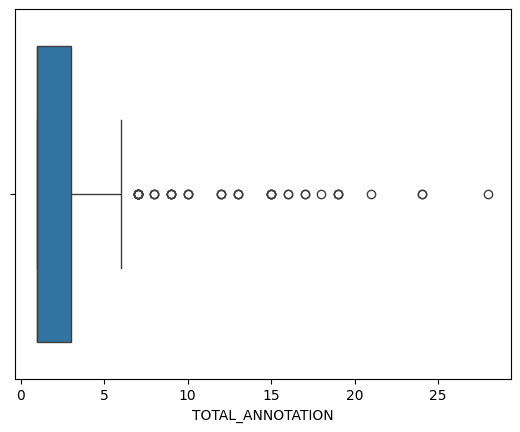

In [86]:
sns.boxplot(Regression_data.TOTAL_ANNOTATION, orient = 'h');

In [87]:
#Identify the outliers
q1 = np.percentile(Regression_data.TOTAL_ANNOTATION, 25)
q3 = np.percentile(Regression_data.TOTAL_ANNOTATION, 75)
iqr = q3 - q1

lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

print('Lower bound:', round(lb, 2))
print('Upper bound:', round(ub, 2))

Lower bound: -2.0
Upper bound: 6.0


In [88]:
print('Number of data with TOTAL_ANNOTATION greater than UB:',
      Regression_data[(Regression_data.TOTAL_ANNOTATION >= ub)].shape[0])
print('Number of data with TOTAL_ANNOTATION lower than LB:  ',
      Regression_data[(Regression_data.TOTAL_ANNOTATION <= lb)].shape[0])

Number of data with TOTAL_ANNOTATION greater than UB: 53
Number of data with TOTAL_ANNOTATION lower than LB:   0


In [89]:
Regression_data_wout_outliers = \
Regression_data[(Regression_data.TOTAL_ANNOTATION < ub) \
           & (Regression_data.TOTAL_ANNOTATION > lb)]

Regression_data_wout_outliers.shape

(618, 43)

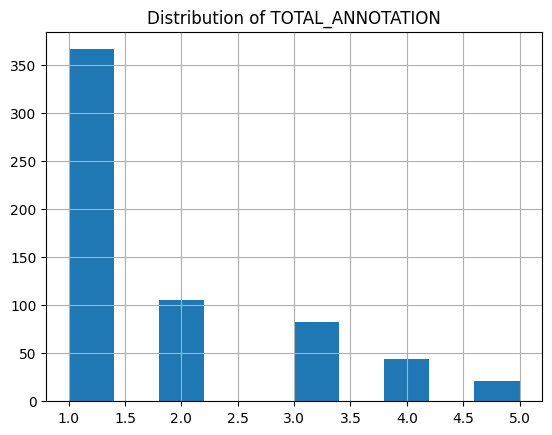

In [90]:
plt.title('Distribution of TOTAL_ANNOTATION')
Regression_data_wout_outliers.TOTAL_ANNOTATION.hist();

In [91]:
#Split the data into target and features
target_data = Regression_data.TOTAL_ANNOTATION 
features = Regression_data.drop(['TOTAL_ANNOTATION'],
                                         axis = 1)

In [92]:
target_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 671 entries, 0 to 670
Series name: TOTAL_ANNOTATION
Non-Null Count  Dtype
--------------  -----
671 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


In [93]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   PAGE_NO                                      671 non-null    int64  
 1   YEAR                                         671 non-null    int32  
 2   IS_WEEKEND                                   671 non-null    int64  
 3   MONTH                                        671 non-null    int32  
 4   DEVICE_NAME_Mobile                           671 non-null    boolean
 5   BROWSER_VERSION_111.0.0.0                    671 non-null    bool   
 6   BROWSER_VERSION_114.0.0.0                    671 non-null    bool   
 7   BROWSER_VERSION_115.0.0.0                    671 non-null    bool   
 8   BROWSER_VERSION_116.0.0.0                    671 non-null    bool   
 9   BROWSER_VERSION_118.0.0.0                    671 non-null    bool   
 10  BR

In [94]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target_data,
                                                    test_size = 0.3,
                                                    random_state=42)

In [95]:
print('Training-data features: ', X_train.shape)
print('Training-data target:   ', y_train.shape)

Training-data features:  (469, 42)
Training-data target:    (469,)


In [96]:
#Check the distribution of the test data
print('Test-data features: ', X_test.shape)
print('Test-data target:   ', y_test.shape)

Test-data features:  (202, 42)
Test-data target:    (202,)


In [97]:
y_test.describe()

count    202.000000
mean       2.534653
std        2.991079
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       19.000000
Name: TOTAL_ANNOTATION, dtype: float64

# 2)Training Model

# Linear Regression model

In [98]:
#Train a linear regression model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [99]:
#Make predictions using the linear regression model
linreg_y_pred = linreg.predict(X_test) 

In [100]:
results_linear = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_linear.insert(1, 'total_pred', linreg_y_pred[:5].round(2))
results_linear

,TOTAL_ANNOTATION,total_pred,PAGE_NO,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,BROWSER_VERSION_115.0.0.0,...,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,CATEGORY_ERROR_PassingParam,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,1,2.22,4,2023,0,12,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
158,1,1.94,2,2023,0,11,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
480,2,4.18,1,2025,0,3,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
641,1,4.70,1,2024,0,11,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
275,1,0.86,2,2023,1,11,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [101]:
# Evaluate the model
mse_linear = mean_squared_error(y_test, linreg_y_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, linreg_y_pred)


In [102]:
mse_linear, rmse_linear, r2_linear

(9.196153151363177, np.float64(3.032515977099408), -0.03301279893687781)

# Plot Graph

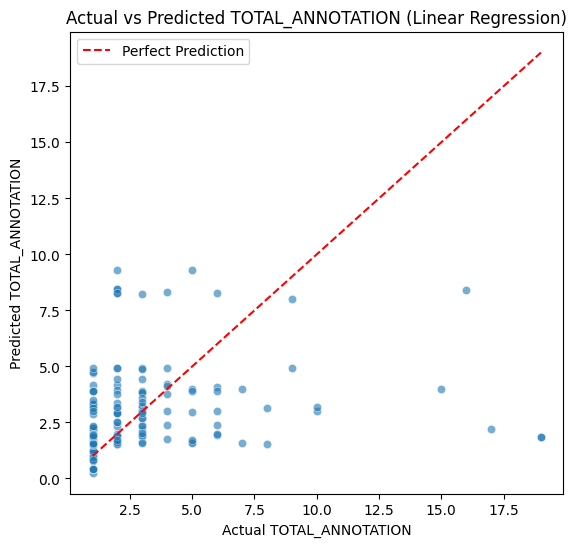

In [103]:
# setting up the figure
plt.figure(figsize=(14, 6))

# plotting the linear regression model
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=linreg_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual TOTAL_ANNOTATION")
plt.ylabel("Predicted TOTAL_ANNOTATION")
plt.title("Actual vs Predicted TOTAL_ANNOTATION (Linear Regression)")
plt.legend()

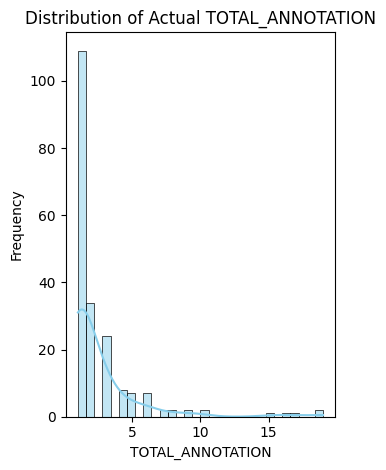

In [104]:
# plotting the distribution of the actual 
plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Actual TOTAL_ANNOTATION")
plt.xlabel("TOTAL_ANNOTATION")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [105]:
# Convert to DataFrame for easier analysis
df_result_linear = pd.DataFrame({
    'Actual': y_test,
    'Predicted': linreg_y_pred
})

# Add a column for the absolute difference between Actual and Predicted
#np.abs() is used to calculate the absolute difference.
df_result_linear['Difference'] = np.abs(df_result_linear['Actual'] - df_result_linear['Predicted'])

# Set a threshold for how close the prediction needs to be, e.g., 0.3
threshold = 0.3

# Filter only the rows that are close to the perfect prediction line (y = x)
near_line = df_result_linear[df_result_linear['Difference'] <= threshold]

# Display the results
#print("Data points close to the Perfect Prediction line:")


#sort_values(by='Difference') sorts the results from the closest (smallest difference) first.
#print(near_line.sort_values(by='Difference'))

In [106]:
near_line.shape

(29, 3)

In [107]:
# Find exactly the right one
# accurate = df_result[df_result['Difference'] == 0].copy() is very accurate
# almost perfect
accurate = df_result_linear[np.isclose(df_result_linear['Actual'], df_result_linear['Predicted'], atol=0.1)].copy()

# Add the Difference and Coordinates
accurate['Difference'] = np.abs(accurate['Actual'] - accurate['Predicted'])
accurate['Coordinates'] = list(zip(accurate['Actual'], accurate['Predicted']))

# display
#print("Data that is almost perfect (e.g., Difference <= 0.1):")
#print(accurate[['Actual', 'Predicted', 'Difference', 'Coordinates']])

In [108]:
accurate.shape

(9, 4)

# Summary For Linear Regression

RMSE ≈ 9.196 → Prediction error of approximately ±9 annotations.

R² ≈ -0.03 → Model only explains -3% of the variation in TOTAL_ANNOTATION.


# Decision Tree model

In [109]:
#Train a decision-tree model

reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [110]:
#Make predictions using the decision-tree model
reg_tree_y_pred = reg_tree.predict(X_test)

In [111]:
# Combine the first 5 rows of y_test and X_test for display
result_decision_tree = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis=1)
result_decision_tree.insert(1, 'total_pred', reg_tree_y_pred[:5].round(2))
result_decision_tree

,TOTAL_ANNOTATION,total_pred,PAGE_NO,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,BROWSER_VERSION_115.0.0.0,...,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,CATEGORY_ERROR_PassingParam,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,1,1.0,4,2023,0,12,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
158,1,1.0,2,2023,0,11,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
480,2,3.0,1,2025,0,3,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
641,1,13.0,1,2024,0,11,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
275,1,1.0,2,2023,1,11,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [112]:
# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, reg_tree_y_pred)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, reg_tree_y_pred)


In [113]:
mse_decision_tree, rmse_decision_tree, r2_decision_tree

(20.962322636593267, np.float64(4.578462912003685), -1.3547180242246384)

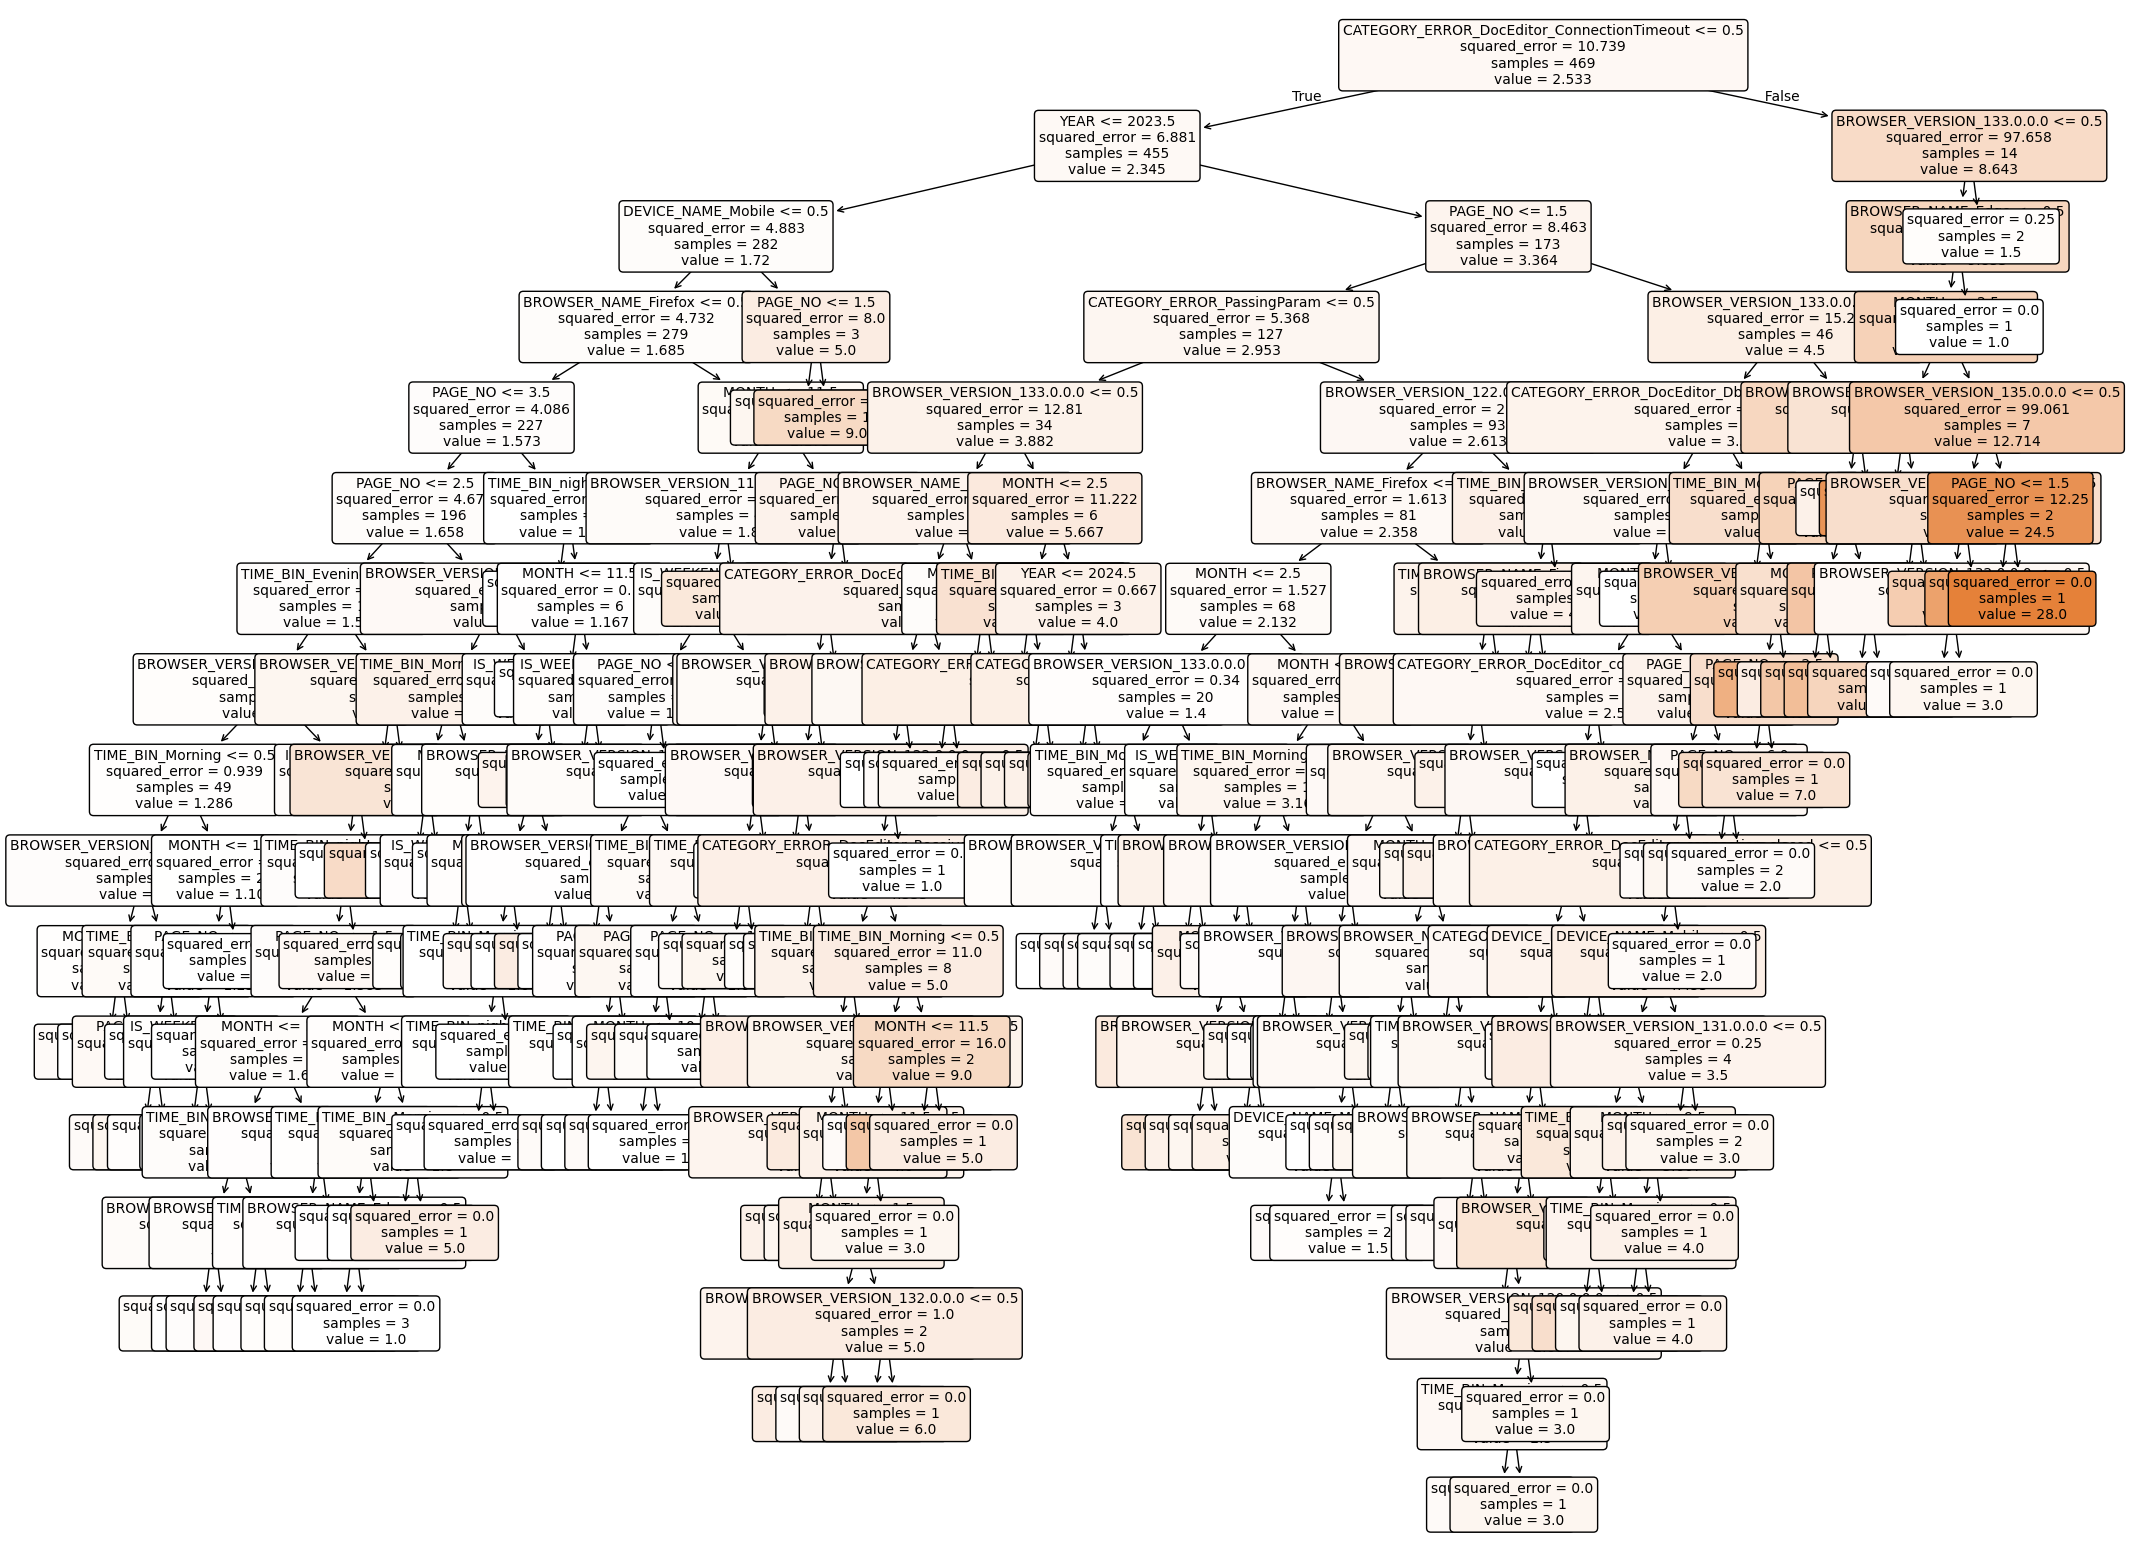

In [114]:
#Visualize the decision tree - details

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(reg_tree,
                    feature_names=list(X_train.columns),
                    filled=True,
                    rounded=True,
                    fontsize=10)

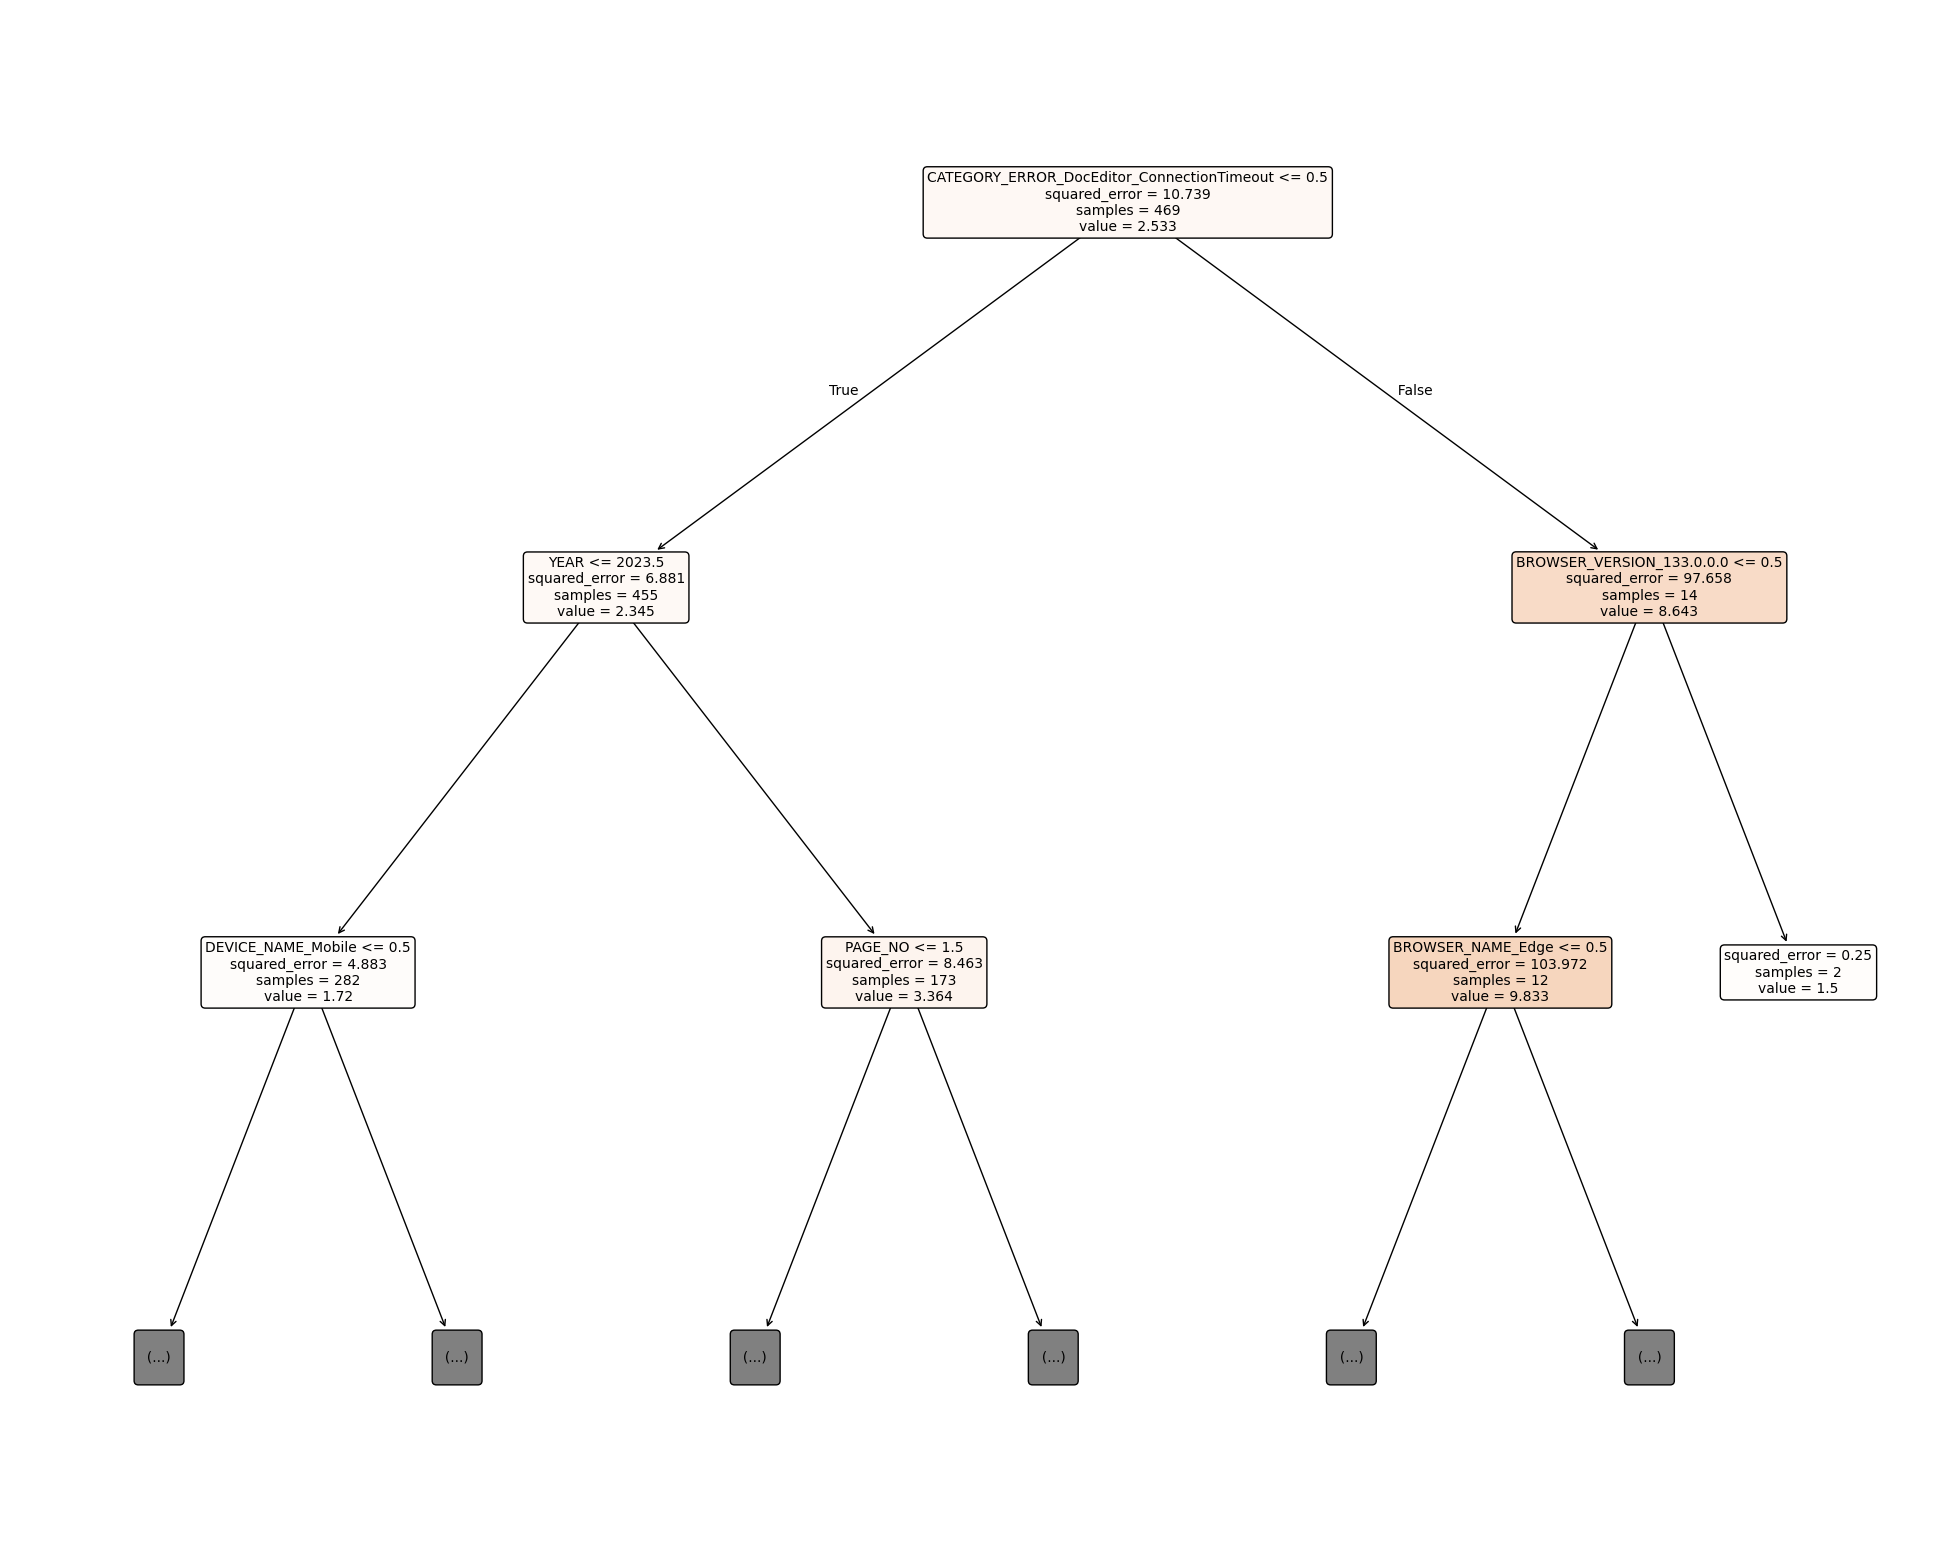

In [115]:
#Visualize the decision tree
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(reg_tree, 
                   feature_names = list(X_train.columns),
                   max_depth = 2,
                   filled = True,rounded=True,
                    fontsize=10)

# Summary For Decision Tree
(20.962322636593267, np.float64(4.578462912003685), -1.3547180242246384)
RMSE ≈ 20.96 → Prediction error of approximately ±20 annotations.

R² ≈ -1.35 → Model only explains -135% of the variation in TOTAL_ANNOTATION.


# Random Forest model

In [116]:
#Train a random-forest model
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
#Make predictions using the RandomForest regression model
randomforest_y_pred = randomforest.predict(X_test) 

In [118]:
results_random_forest = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_random_forest.insert(1, 'total_pred', randomforest_y_pred[:5].round(2))
results_random_forest

,TOTAL_ANNOTATION,total_pred,PAGE_NO,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,BROWSER_VERSION_115.0.0.0,...,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,CATEGORY_ERROR_PassingParam,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,1,2.05,4,2023,0,12,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
158,1,1.03,2,2023,0,11,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
480,2,2.55,1,2025,0,3,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
641,1,8.86,1,2024,0,11,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
275,1,1.92,2,2023,1,11,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [119]:
# Evaluate the model
mse_random_forest = mean_squared_error(y_test, randomforest_y_pred)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, randomforest_y_pred)


In [120]:
mse_random_forest, rmse_random_forest, r2_random_forest

(12.758908381550064, np.float64(3.571961419381523), -0.4332205479473217)

# Plot The Graph

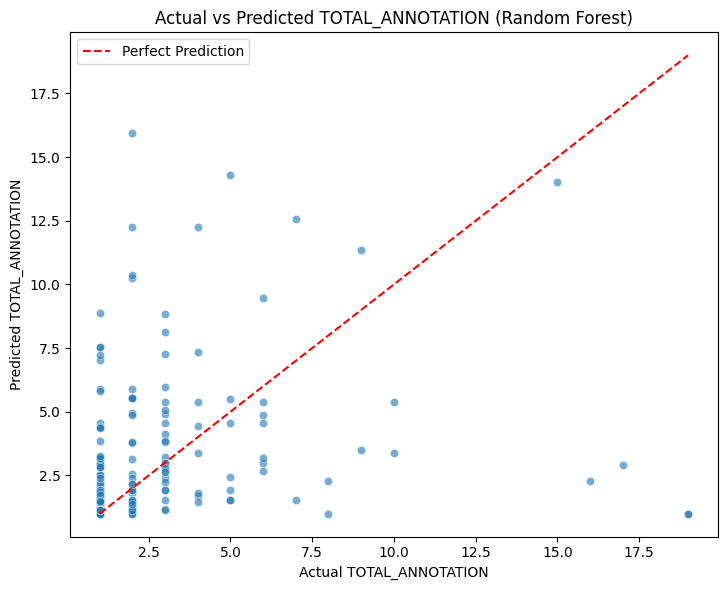

In [121]:
# setting up the figure
plt.figure(figsize=(14, 6))

# plotting the Random Forest model
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=randomforest_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual TOTAL_ANNOTATION")
plt.ylabel("Predicted TOTAL_ANNOTATION")
plt.title("Actual vs Predicted TOTAL_ANNOTATION (Random Forest)")
plt.legend()

plt.tight_layout()
plt.show()

In [122]:
# Convert to DataFrame for easier analysis
df_result_randomforest = pd.DataFrame({
    'Actual': y_test,
    'Predicted': randomforest_y_pred
})

# Add a column for the absolute difference between Actual and Predicted
#np.abs() is used to calculate the absolute difference.
df_result_randomforest['Difference'] = np.abs(df_result_randomforest['Actual'] - df_result_randomforest['Predicted'])

# Set a threshold for how close the prediction needs to be, e.g., 0.3
threshold = 0.3

# Filter only the rows that are close to the perfect prediction line (y = x)
near_line = df_result_randomforest[df_result_randomforest['Difference'] <= threshold]

near_line.shape

(54, 3)

In [123]:
# Find exactly the right one
# accurate = df_result[df_result['Difference'] == 0].copy() is very accurate
# almost perfect
accurate = df_result_randomforest[np.isclose(df_result_randomforest['Actual'], df_result_randomforest['Predicted'], atol=0.1)].copy()

# Add the Difference and Coordinates
accurate['Difference'] = np.abs(accurate['Actual'] - accurate['Predicted'])
accurate['Coordinates'] = list(zip(accurate['Actual'], accurate['Predicted']))


accurate.shape

(35, 4)

# Summary For Random Forest
(12.758908381550064, np.float64(3.571961419381523), -0.4332205479473217)
RMSE ≈ 12.759 → Prediction error of approximately ±12 annotations.

R² ≈ -0.43 → Model only explains -43% of the variation in TOTAL_ANNOTATION.

# Gradient-Boosting model

In [124]:
#Train a gradient-boosting model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [125]:
#Make predictions using the gradient-boosting model
xgb_y_pred = xgb.predict(X_test)

In [126]:
results_gradient_boosting = pd.concat([y_test.iloc[:5], X_test.iloc[:5]], axis = 1)
results_gradient_boosting.insert(1, 'total_pred', xgb_y_pred[:5].round(2))
results_gradient_boosting

,TOTAL_ANNOTATION,total_pred,PAGE_NO,YEAR,IS_WEEKEND,MONTH,DEVICE_NAME_Mobile,BROWSER_VERSION_111.0.0.0,BROWSER_VERSION_114.0.0.0,BROWSER_VERSION_115.0.0.0,...,CATEGORY_ERROR_DocEditor_ConnectionTimeout,CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,CATEGORY_ERROR_DocEditor_ProviderFailed,CATEGORY_ERROR_DocEditor_ReceiveError,CATEGORY_ERROR_DocEditor_connection_closed,CATEGORY_ERROR_Other,CATEGORY_ERROR_PassingParam,TIME_BIN_Evening,TIME_BIN_Morning,TIME_BIN_night
361,1,1.34,4,2023,0,12,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
158,1,1.38,2,2023,0,11,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
480,2,2.43,1,2025,0,3,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
641,1,12.01,1,2024,0,11,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
275,1,1.16,2,2023,1,11,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [127]:
# Evaluate the model
mse_gradient_boosting = mean_squared_error(y_test, xgb_y_pred)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, xgb_y_pred)

In [128]:
mse_gradient_boosting, rmse_gradient_boosting, r2_gradient_boosting

(18.46006965637207, np.float64(4.296518317937452), -1.0736374855041504)

# Summary For Gradient Boosting
(18.46006965637207, np.float64(4.296518317937452), -1.0736374855041504)
RMSE ≈ 18.46 → Prediction error of approximately ±12 annotations.

R² ≈ -1.07→ Model only explains -107% of the variation in TOTAL_ANNOTATION.

# 3)Tuning The Model

# Linear Regression

In [129]:
#Define the parameter grid used to tune the linear regression model

param_grid_linear = {'l1_ratio': [0.1, 0.5, 0.9],
              'alpha': [0.0001, 0.01, 0.1],
              'max_iter': [100, 1000, 10000]}

print(param_grid_linear)

{'l1_ratio': [0.1, 0.5, 0.9], 'alpha': [0.0001, 0.01, 0.1], 'max_iter': [100, 1000, 10000]}


In [130]:
#Perform a grid search for optimal elastic net hyperparameters

model_linear = ElasticNet()
gs_linear = GridSearchCV(estimator = model_linear,
                  param_grid = param_grid_linear,
                  n_jobs = -1,
                  verbose = 2)

gs_linear.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01, 0.1],
                         'l1_ratio': [0.1, 0.5, 0.9],
                         'max_iter': [100, 1000, 10000]},
             verbose=2)

In [131]:
#(9.196153151363177, np.float64(3.032515977099408), -0.03301279893687781) From Linear Regression
print('Best R2 score:   ', round(gs_linear.best_score_, 4))
print('Best parameters: ', gs_linear.best_params_)

Best R2 score:    0.0907
Best parameters:  {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 100}


# Decision Tree

In [132]:
#Define the parameter grid used to tune the decision-tree model
param_grid_Decision_Tree = {'max_depth': [5, 10, 20],
              'min_samples_split': [10, 100, 1000],
              'min_samples_leaf': [10, 100, 1000]}

print(param_grid_Decision_Tree)

{'max_depth': [5, 10, 20], 'min_samples_split': [10, 100, 1000], 'min_samples_leaf': [10, 100, 1000]}


In [133]:
#Perform a grid search for optimal decision-tree hyperparameters
model_Decision_Tree = DecisionTreeRegressor()
gs_Decision_Tree = GridSearchCV(estimator = model_Decision_Tree,
                  param_grid = param_grid_Decision_Tree,
                  n_jobs = -1,
                  verbose = 2)

gs_Decision_Tree.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [10, 100, 1000],
                         'min_samples_split': [10, 100, 1000]},
             verbose=2)

In [134]:
#(20.962322636593267, np.float64(4.578462912003685), -1.3547180242246384) from decision tree
print('Best R2 score:   ', round(gs_Decision_Tree.best_score_, 4))
print('Best parameters: ', gs_Decision_Tree.best_params_)

Best R2 score:    0.0555
Best parameters:  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 10}


# Random Forest

In [ ]:
param_grid_Random_Forest = {    
    'n_estimators': [100, 200],                 # Number of trees
    'max_depth': [10, 20, None],                # Maximum depth of each tree
    'min_samples_split': [2, 10, 100],          # Minimum examples for internal splits
    'min_samples_leaf': [1, 4, 50],             # Minimum examples in each leaf
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider at each split
}


print(param_grid_Random_Forest)

{'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 10, 100], 'min_samples_leaf': [1, 4, 50], 'max_features': ['auto', 'sqrt', 'log2']}


In [136]:
model_random_forest = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=model_random_forest,
                              param_grid=param_grid_Random_Forest,
                              #cv=3,
                              n_jobs = -1,
                              verbose = 2
                              #scoring='neg_mean_squared_error'
                              )
                              

grid_search_rf.fit(X_train, y_train)



Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 50],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [100, 200]},
             verbose=2)

In [137]:
#(12.758908381550064, np.float64(3.571961419381523), -0.4332205479473217) from random forest
print("Best R2 score:", round(grid_search_rf.best_score_, 4))
print("Best parameters:", grid_search_rf.best_params_)

Best R2 score: 0.0918
Best parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 100, 'n_estimators': 200}


# Extreme Gradient Boosting (XGBRegressor)

In [138]:
param_grid_XGB = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'reg_alpha': [0, 0.1, 1],    # L1 regularization
    'reg_lambda': [1, 10]        # L2 regularization
}

In [139]:
# Model asas
model_xgb = XGBRegressor(random_state=42) #, objective='reg:squarederror'

# GridSearch
grid_search_xgb = GridSearchCV(estimator=model_xgb,
                               param_grid=param_grid_XGB,
                               #cv=3,
                               n_jobs= -1,
                               #scoring='neg_mean_squared_error',
                               #verbose=1
                               verbose= 2
                               )

# Jalankan pencarian
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    lear...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 10],
                         'subsample': [0.7, 1.0]},
             verbose=2)

In [140]:
#(18.46006965637207, np.float64(4.296518317937452), -1.0736374855041504) from XGBoost
print("Best R2 score:", round(grid_search_xgb.best_score_, 4))
print("Best parameters:", grid_search_xgb.best_params_)

Best R2 score: 0.0805
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.7}


# 4) Compare the evaluation metrics for each model

In [141]:
#Compare evaluation metrics for each model
models = ['Linear Regression', 'Decision Tree',
          'Random Forest', 'XGBoost', 'Dummy Regressor']

metrics = ['R2', 'MAE', 'MSE']

pred_list = ['linreg_y_pred', 'reg_tree_y_pred',
             'randomforest_y_pred', 'xgb_y_pred', 'dummy_y_pred']

# Baseline algorithm.
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy_y_pred = dummy.predict(X_test)

scores = np.empty((0, 3))

for i in pred_list:
    scores = np.append(scores,
                       np.array([[r2_score(y_test, globals()[i]),
                                  mean_absolute_error(y_test, globals()[i]),
                                  mean_squared_error(y_test, globals()[i])]]),
                       axis = 0)

scores = np.around(scores, 4)

scoring_df = pd.DataFrame(scores, index = models, columns = metrics)
scoring_df.sort_values(by = 'MSE', ascending = True)

,R2,MAE,MSE
Dummy Regressor,-0.0000,1.8355,8.9023
Linear Regression,-0.0330,1.7396,9.1962
Random Forest,-0.4332,1.9525,12.7589
XGBoost,-1.0736,2.2700,18.4601
Decision Tree,-1.3547,2.2001,20.9623


# The Best Model

# 5) Plot the residuals

In [142]:
#dummy is not the best model and not using for real prediction
#use for comparison only and benchmarking


# Set up data frame for plotting.

# First the best Dummy Regressor

resid_df = pd.DataFrame()
resid_df['total_annotations'] = y_test
resid_df['total_pred'] = dummy_y_pred
resid_df['residuals'] = resid_df['total_annotations'] - resid_df['total_pred']
resid_df = resid_df.sort_values('total_annotations')[::20]
resid_df['record_num'] = np.arange(len(resid_df))

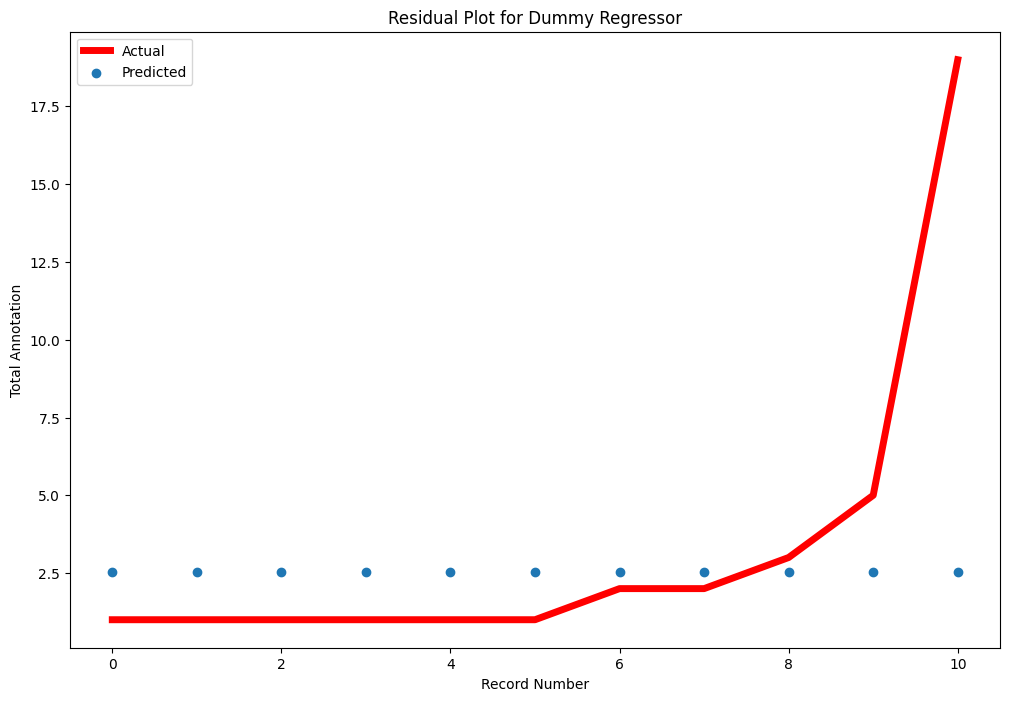

In [143]:
plt.figure(figsize = (12, 8))

plt.plot(resid_df['record_num'], resid_df['total_annotations'],
         color = 'red', linewidth = 5)
plt.scatter(resid_df['record_num'], resid_df['total_pred'])

plt.legend(['Actual', 'Predicted'])
plt.title('Residual Plot for Dummy Regressor')
plt.ylabel('Total Annotation')
plt.xlabel('Record Number')
plt.show();

In [144]:
#Second the best Linear Regressor
#the simple model is the best model for this data

resid_df_2 = pd.DataFrame()
resid_df_2['total_annotations'] = y_test
resid_df_2['total_pred'] = linreg_y_pred
resid_df_2['residuals'] = resid_df_2['total_annotations'] - resid_df_2['total_pred']
resid_df_2 = resid_df_2.sort_values('total_annotations')[::20]
resid_df_2['record_num'] = np.arange(len(resid_df_2))

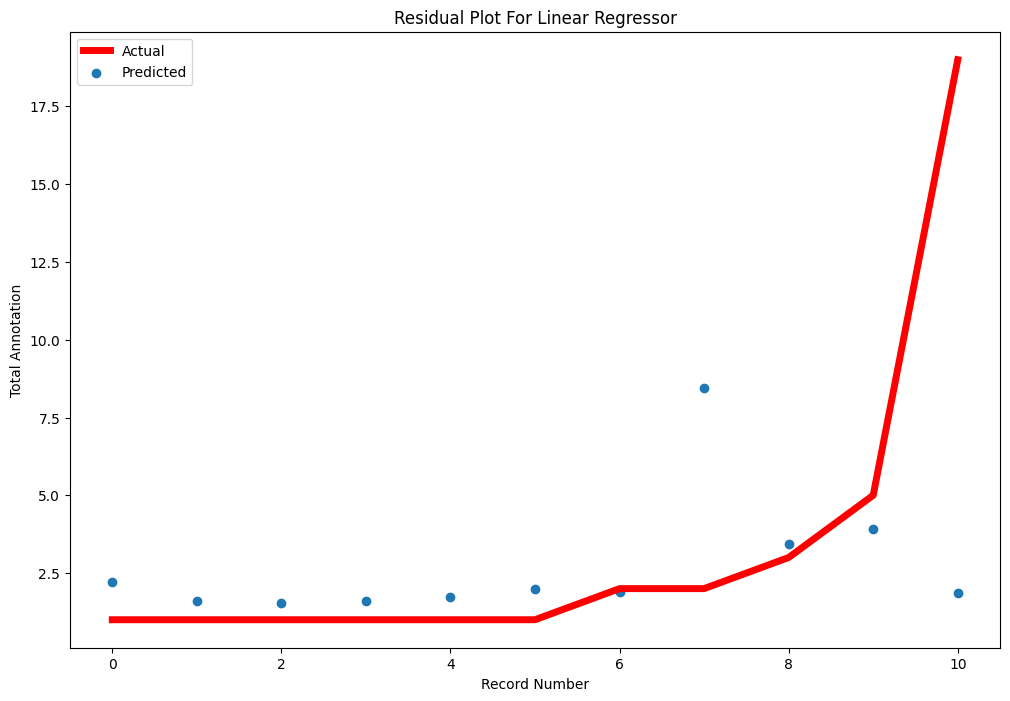

In [145]:
plt.figure(figsize = (12, 8))

plt.plot(resid_df_2['record_num'], resid_df_2['total_annotations'],
         color = 'red', linewidth = 5)
plt.scatter(resid_df_2['record_num'], resid_df_2['total_pred'])

plt.legend(['Actual', 'Predicted'])
plt.title('Residual Plot For Linear Regressor')
plt.ylabel('Total Annotation')
plt.xlabel('Record Number')
plt.show();

# 6) plot feature-importance 

In [146]:
#Generate a feature-importance plot

# Feature importance for Linear Regression, second best model
def feature_importance_plot(X_train, n):
    """Plots feature importance. only for linear regression because have standardized ."""

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    feature_names = X_train.columns

    model_linear_regression = LinearRegression()
    model_linear_regression.fit(X_scaled, y_train)

    coefficients_linear = model_linear_regression.coef_

    coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients_linear,
    "Importance": np.abs(coefficients_linear)
  })
    
    top5 = coef_df.sort_values(by="Importance", ascending=False).head(n)

    # 5. Plot
    plt.figure(figsize=(10, 6))
    plt.barh(top5["Feature"], top5["Coefficient"], color='skyblue')
    plt.xlabel("Coefficient Value (Feature Importance)")
    plt.title("Top 5 Important Features (Linear Regression)")
    plt.axvline(x=0, color='k', linestyle='--')
    plt.tight_layout()
    plt.show()



In [147]:
#Generate a feature-importance plot

def feature_importance_plot_XGB(model, X_train, n):
    """Plots feature importance. Only works for ensemble learning."""
    plt.figure(figsize = (8, 5))
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

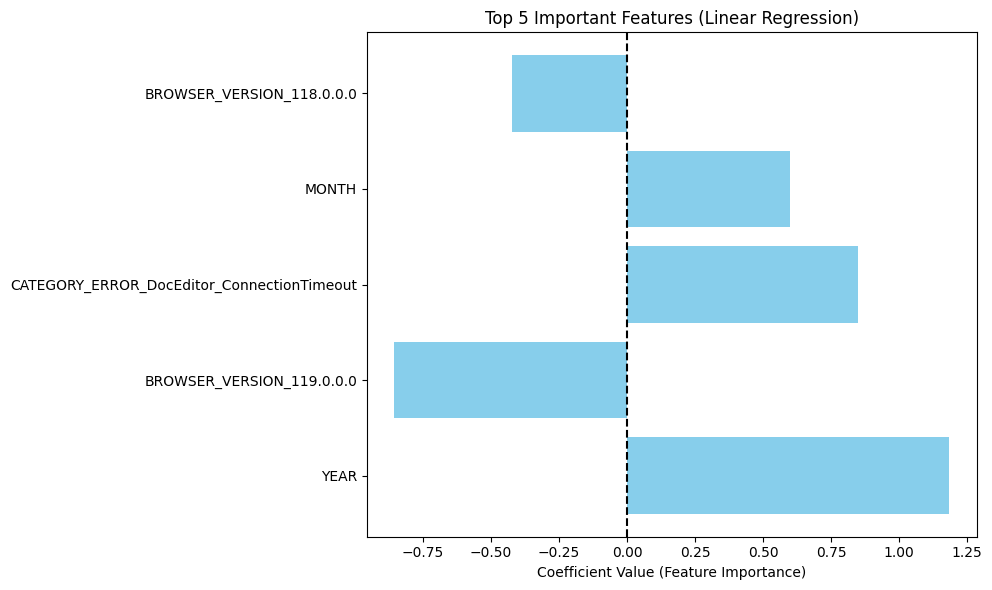

In [148]:
# linreg for linear regression
feature_importance_plot(X_train, 5)

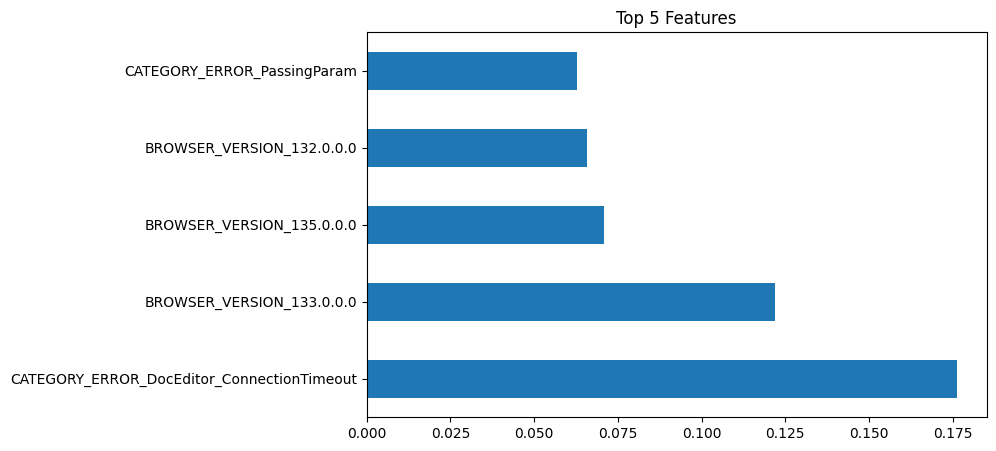

In [149]:
# XGB for Extreme Gradient Boosting regression
feature_importance_plot_XGB(xgb,X_train, 5)

# 7)Plot learning curves

In [150]:
def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    plt.figure(figsize = (5, 5))
    train_sizes, train_scores, test_scores = \
    learning_curve(model, X_train, y_train, cv = 5,
                   scoring = 'neg_mean_squared_error',
                   n_jobs = -1,
                   shuffle = True,
                   train_sizes = np.linspace(0.01, 1.0, 5))
        
    # Means of training and test set scores.
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Draw lines.
    plt.plot(train_sizes, train_mean, '--',
             color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean,
             color = '#111111', label = 'Cross-validation score')

    # Create plot.
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Negative MSE')
    plt.legend(loc = 'best')
    plt.tight_layout()

    plt.show()

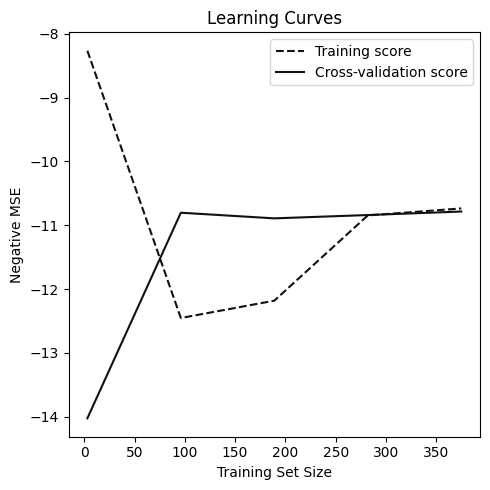

In [151]:
plot_learning_curves(dummy, X_train, y_train)

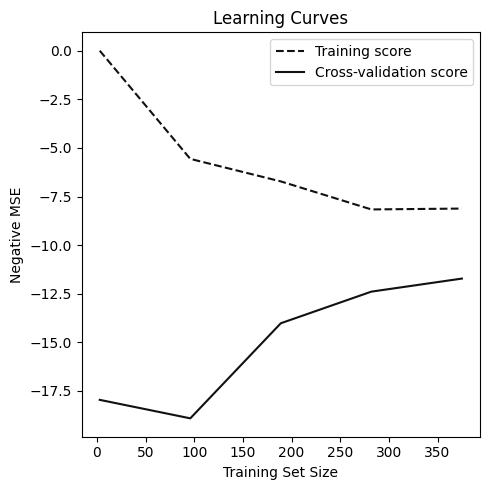

In [152]:
plot_learning_curves(linreg, X_train, y_train)

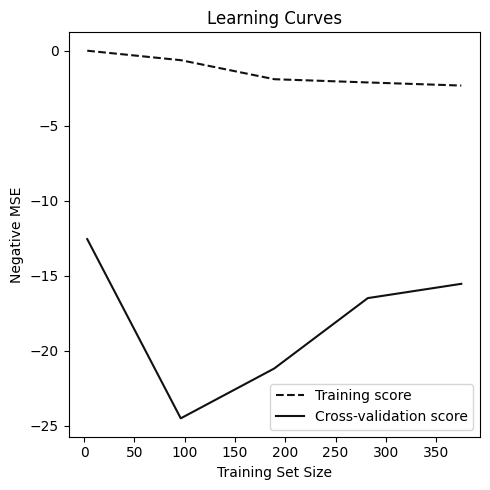

In [153]:
plot_learning_curves(xgb, X_train, y_train)

# 8) Conclusion


1) To Predict Total Annotations added by a user.
2) The Distribution of Total Annotation have the most data in 1 annotation. This result it showing that is a low variance.
3) Trainning data in 70% and Test is 30%
4) Evaluate Linear Regression in R2 is -3%
5) Evaluate Decision Tree in R2 is -135%
6) Evaluate Random Forest in R2 is -43%
7) Evaluate Gradient Boosting in R2 is -107%
8) Tuning Linear Regression with ElasticNet and Grid Search show R2 is 9% with best parameters:  {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 100}
9) Tuning Decision Tree with Grid Search show R2 is 5% with best parameters:   {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 10}
10) Tuning Random Forest with Grid Search show R2 is 9% with best parameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 100, 'n_estimators': 200}
11) Tuning Gradient Boosting with Grid Search show R2 is 8% with best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.7}
12) Compare Evaluation metrics for each model Dummy Regression, Linear Regression, Decision Tree,Random Forest,XGBoost
13) Used Dummy model (not using in real production) but used as benchmark.
14) The best model show the dummy is better. Means the other model is not very good to predict. But The linear regression is better after Dummy Regression.
15) The data is suitable and good with simple model.
16) The data is low variance, almost target data has same value.
17) The Features doesnt have a strong corelation
18) The model overfitting and memorize the training result. when come to test data it cannot to predicted well.
19) The Important Features for Linear Regression is Browser version 118,month, Error with connection Timeout,rowser version 119 and Year.
20) The Plot Learning curve for Linear Regression used the Negative Mean Squared Error(MSE) metric. The Training score show the negative number increasingly when more data trainning coming.
21) When increasingly the error also increasing. Means the model become hard to predict. But when it goes to -7 its become better and with increasing training data.
22) For Cross-Validation Score showing that more better when decreasing negative number. Means the model become good to generalize the new data when more data training.
23) The Gap is bigger between Training score and cross-validation score. so the model still couldnt better to predict. The model is underfitting and cannot capture the complex relationship between features beacuse the model is simple. Even with more data still cannot topredicted well with new data. The Data also has a high bias and low variance.